In [1]:
import os, pathlib, random, json

import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing import image
from tensorflow.keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import models, utils

2022-08-20 19:34:32.733992: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
base_directory = 'dataset'
train_directory = os.path.join(base_directory, 'train')
validate_directory = os.path.join(base_directory, 'validation')
test_directory = os.path.join(base_directory, 'test')
seed = 61

def createGenerator(directory, batch_size=1, image_size=(384, 384), mask_size=(384, 384)):
    image_datagen = ImageDataGenerator(rotation_range=np.pi, horizontal_flip=True, vertical_flip=True, rescale=1/255)
    mask_datagen = ImageDataGenerator(rotation_range=np.pi, horizontal_flip=True, vertical_flip=True, rescale=1/255)
    image_generator = image_datagen.flow_from_directory(
        directory,
        classes=['images'],
        class_mode=None,
        target_size=image_size,
        batch_size=batch_size,
        seed=seed
    )
    mask_generator = mask_datagen.flow_from_directory(
        directory,
        classes=['masks'],
        class_mode=None,
        target_size=mask_size,
        batch_size=batch_size,
        seed=seed
    )
    return zip(image_generator, mask_generator)


In [3]:
train_generator = createGenerator(train_directory, 1, (384, 384), (384, 384))
validate_generator = createGenerator(validate_directory, 4, (384, 384), (384, 384))

Found 1964 images belonging to 1 classes.
Found 1964 images belonging to 1 classes.
Found 491 images belonging to 1 classes.
Found 491 images belonging to 1 classes.


In [4]:
model = models.padding_model()
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 384, 384, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 384, 384, 64  1792        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 384, 384, 64  36928       ['conv2d[0][0]']                 
                                )                                                             

2022-08-20 19:34:34.920948: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-08-20 19:34:34.967691: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-08-20 19:34:34.968050: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-08-20 19:34:34.968604: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the ap

                                                                                                  
 max_pooling2d_2 (MaxPooling2D)  (None, 48, 48, 256)  0          ['dropout[0][0]']                
                                                                                                  
 conv2d_6 (Conv2D)              (None, 48, 48, 512)  1180160     ['max_pooling2d_2[0][0]']        
                                                                                                  
 conv2d_7 (Conv2D)              (None, 48, 48, 512)  2359808     ['conv2d_6[0][0]']               
                                                                                                  
 dropout_1 (Dropout)            (None, 48, 48, 512)  0           ['conv2d_7[0][0]']               
                                                                                                  
 up_sampling2d (UpSampling2D)   (None, 96, 96, 512)  0           ['dropout_1[0][0]']              
          

In [5]:
history = model.fit(train_generator, batch_size=1, steps_per_epoch=400, epochs=100, verbose=1, 
                    validation_data=validate_generator, validation_batch_size=4, validation_steps=50)

Epoch 1/100


2022-08-20 19:34:38.433861: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8500
2022-08-20 19:34:39.423337: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-08-20 19:34:39.702382: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.55GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2022-08-20 19:34:39.702444: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.55GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2022-08-20 19:34:40.598589: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to al

400/400 [==============================] - 72s 163ms/step - loss: 0.4605 - acc: 0.7636 - val_loss: 0.3909 - val_acc: 0.7886
Epoch 2/100
400/400 [==============================] - 64s 160ms/step - loss: 0.4169 - acc: 0.8181 - val_loss: 0.4178 - val_acc: 0.8311
Epoch 3/100
400/400 [==============================] - 66s 165ms/step - loss: 0.3950 - acc: 0.8341 - val_loss: 0.3871 - val_acc: 0.8483
Epoch 4/100
400/400 [==============================] - 64s 159ms/step - loss: 0.3846 - acc: 0.8402 - val_loss: 0.4333 - val_acc: 0.8260
Epoch 5/100
400/400 [==============================] - 64s 159ms/step - loss: 0.3819 - acc: 0.8449 - val_loss: 0.3538 - val_acc: 0.8525
Epoch 6/100
400/400 [==============================] - 64s 159ms/step - loss: 0.4062 - acc: 0.8279 - val_loss: 0.3575 - val_acc: 0.8638
Epoch 7/100
400/400 [==============================] - 63s 159ms/step - loss: 0.3839 - acc: 0.8389 - val_loss: 0.3862 - val_acc: 0.8442
Epoch 8/100
400/400 [==============================] - 63s 1

In [6]:
import matplotlib.pyplot as plt
import json

def plot_graphs(history, smooth = False):
    
    def smooth_curve(points, factor=0.8):
        smoothed_points = []
        for point in points:
            if smoothed_points:
                previous = smoothed_points[-1]
                smoothed_points.append(previous * factor + point * (1 - factor))
            else:
                smoothed_points.append(point)
        return smoothed_points
   
    acc = smooth_curve(history['acc']) if smooth else history['acc']
    val_acc = smooth_curve(history['val_acc']) if smooth else history['val_acc']
    loss = smooth_curve(history['loss']) if smooth else history['loss']
    val_loss = smooth_curve(history['val_loss']) if smooth else history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    
    plt.figure()
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

def save_dict_as_json(data, file_name):
    with open(file_name + ".json", "w") as fp:
        json.dump(data,fp, indent = 4) 

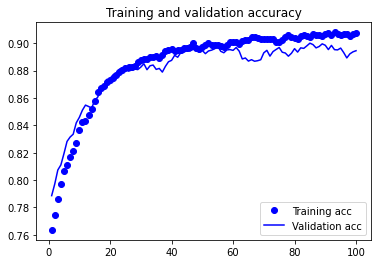

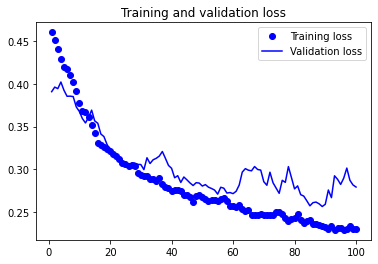

In [7]:
plot_graphs(history.history, smooth=True)

In [8]:
test_generator = createGenerator(test_directory, 1, (384, 384), (384, 384))
test_loss, test_acc = model.evaluate(test_generator, steps=400)
print('test loss:', test_loss)
print('test acc:', test_acc)

Found 410 images belonging to 1 classes.
Found 410 images belonging to 1 classes.
400/400 [==============================] - 20s 50ms/step - loss: 0.2511 - acc: 0.9030
test loss: 0.2510625720024109
test acc: 0.9030250906944275


In [10]:
#save_dict_as_json(history.history, "modelpadding")
#model.save("modelpadding.h5")